In [13]:
pip install pandas pyarrow


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
# Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Membaca dataset fitur dinamis dari file parquet
df_Dynamic_Features = pd.read_parquet("C:\\Data Raihan\\Penelitian Threshold\\Dataset\\CCCS-CIC-AndMal-2020\\cicandmal2020-dynamic.parquet")

# Menampilkan informasi lengkap dari DataFrame
df_Dynamic_Features.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53439 entries, 0 to 53438
Data columns (total 145 columns):
 #    Column                                                                              Non-Null Count  Dtype 
---   ------                                                                              --------------  ----- 
 0    Memory_PssTotal                                                                     53439 non-null  int32 
 1    Memory_PssClean                                                                     53439 non-null  int32 
 2    Memory_SharedDirty                                                                  53439 non-null  int32 
 3    Memory_PrivateDirty                                                                 53439 non-null  int32 
 4    Memory_SharedClean                                                                  53439 non-null  int32 
 5    Memory_PrivateClean                                                                 53439 non

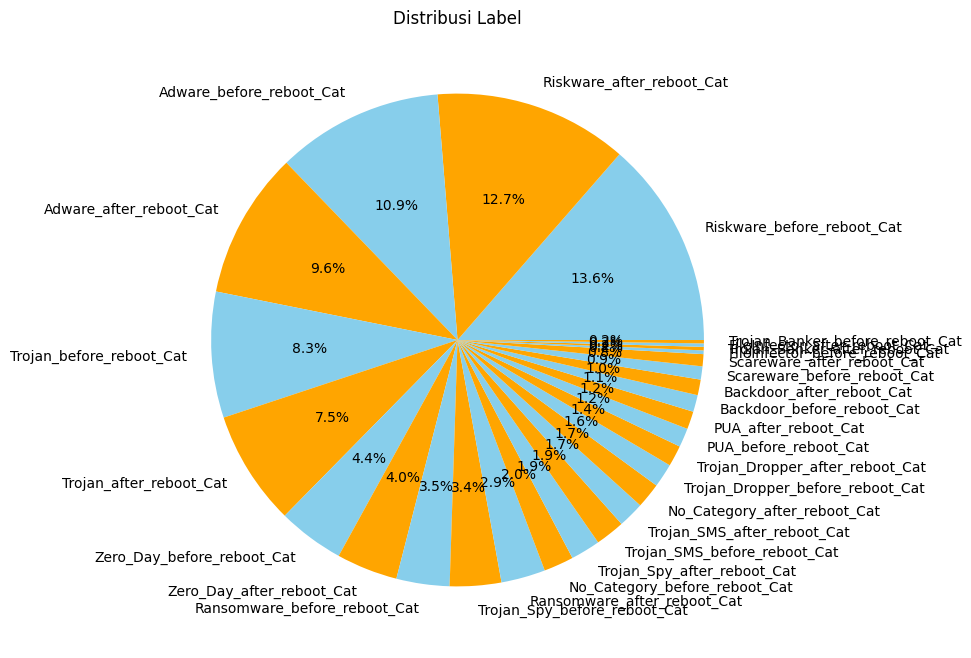

Deskripsi Distribusi Label:
Riskware_before_reboot_Cat          7261
Riskware_after_reboot_Cat           6792
Adware_before_reboot_Cat            5838
Adware_after_reboot_Cat             5142
Trojan_before_reboot_Cat            4412
Trojan_after_reboot_Cat             4025
Zero_Day_before_reboot_Cat          2329
Zero_Day_after_reboot_Cat           2146
Ransomware_before_reboot_Cat        1861
Trojan_Spy_before_reboot_Cat        1801
Ransomware_after_reboot_Cat         1550
No_Category_before_reboot_Cat       1048
Trojan_Spy_after_reboot_Cat         1039
Trojan_SMS_before_reboot_Cat        1028
Trojan_SMS_after_reboot_Cat          911
No_Category_after_reboot_Cat         884
Trojan_Dropper_before_reboot_Cat     837
Trojan_Dropper_after_reboot_Cat      733
PUA_before_reboot_Cat                665
PUA_after_reboot_Cat                 625
Backdoor_before_reboot_Cat           591
Backdoor_after_reboot_Cat            546
Scareware_before_reboot_Cat          462
Scareware_after_reboot_Cat   

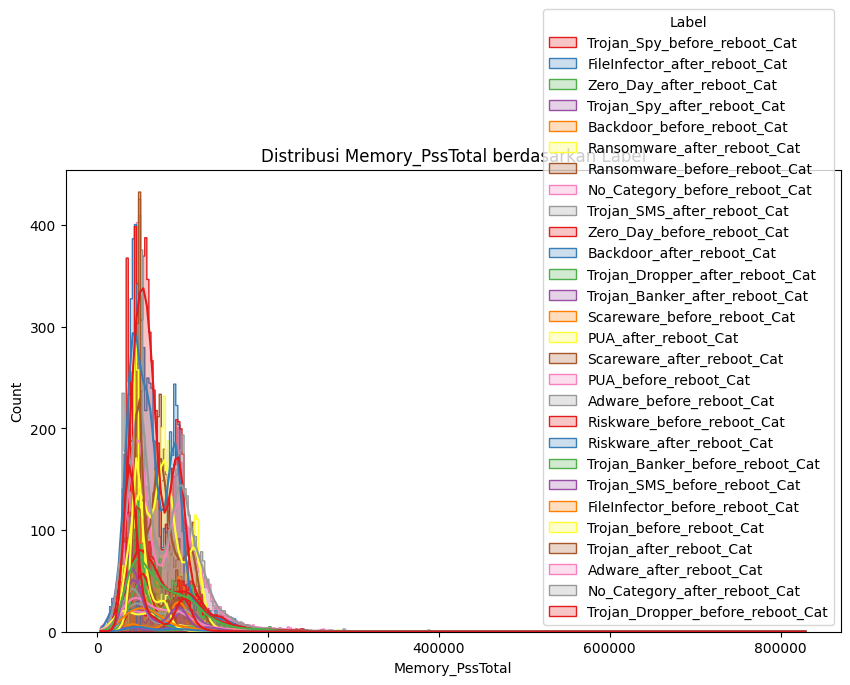


Deskripsi Memory_PssTotal:
                                   count          mean           std      min  \
Label                                                                           
Adware_after_reboot_Cat           5142.0  77807.567483  45382.605264   5514.0   
Adware_before_reboot_Cat          5838.0  77588.918808  41158.668136   5631.0   
Backdoor_after_reboot_Cat          546.0  62594.380952  31812.123880  11073.0   
Backdoor_before_reboot_Cat         591.0  66977.196277  44982.230497  27537.0   
FileInfector_after_reboot_Cat      119.0  73957.151261  33184.353816  26656.0   
FileInfector_before_reboot_Cat     129.0  74043.534884  32562.718111  23866.0   
No_Category_after_reboot_Cat       884.0  76131.426471  45980.007529  27606.0   
No_Category_before_reboot_Cat     1048.0  72915.305344  49509.381250   6028.0   
PUA_after_reboot_Cat               625.0  63441.284800  39586.423079  21304.0   
PUA_before_reboot_Cat              665.0  69518.180451  45976.123492   9255.0   


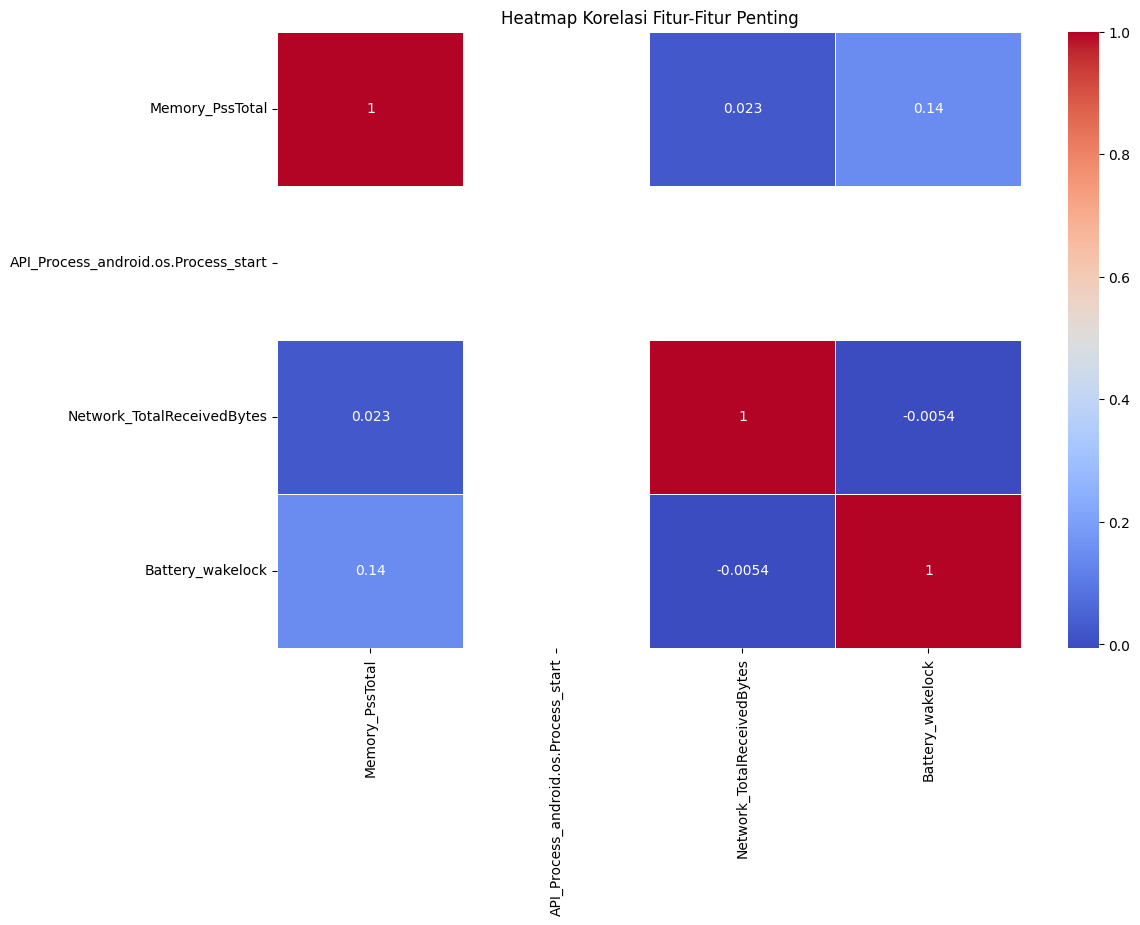


Deskripsi Korelasi Fitur:
                                      Memory_PssTotal  \
Memory_PssTotal                              1.000000   
API_Process_android.os.Process_start              NaN   
Network_TotalReceivedBytes                   0.022700   
Battery_wakelock                             0.144415   

                                      API_Process_android.os.Process_start  \
Memory_PssTotal                                                        NaN   
API_Process_android.os.Process_start                                   NaN   
Network_TotalReceivedBytes                                             NaN   
Battery_wakelock                                                       NaN   

                                      Network_TotalReceivedBytes  \
Memory_PssTotal                                         0.022700   
API_Process_android.os.Process_start                         NaN   
Network_TotalReceivedBytes                              1.000000   
Battery_wakelock        

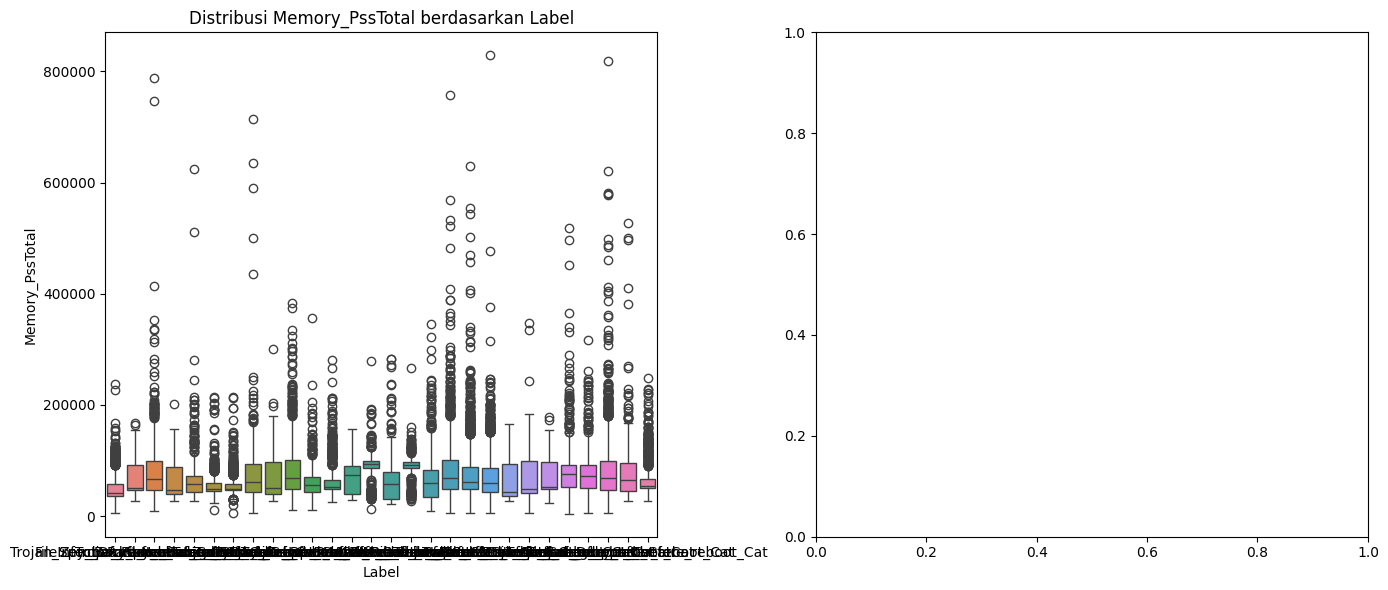


Deskripsi Memory_PssTotal dan API_Usage:
Kolom 'API_Usage' tidak ditemukan dalam DataFrame


In [17]:
# Visualisasi Distribusi Label
plt.figure(figsize=(8, 8))
df_Dynamic_Features["Label"].value_counts().plot(kind="pie", autopct="%1.1f%%", colors=['skyblue', 'orange'])
plt.title("Distribusi Label")
plt.ylabel("")  # Menghilangkan label y agar lebih bersih
plt.show()

# Deskripsi Singkat Tentang Distribusi Label
print("Deskripsi Distribusi Label:")
label_counts = df_Dynamic_Features["Label"].value_counts()
print(label_counts)

# Visualisasi Distribusi Memory_PssTotal
plt.figure(figsize=(10, 6))
sns.histplot(df_Dynamic_Features, x="Memory_PssTotal", hue="Label", element="step", palette="Set1", kde=True)
plt.title("Distribusi Memory_PssTotal berdasarkan Label")
plt.xlabel("Memory_PssTotal")
plt.ylabel("Count")
plt.show()

# Deskripsi Singkat Tentang Memory_PssTotal
print("\nDeskripsi Memory_PssTotal:")
print(df_Dynamic_Features.groupby("Label")["Memory_PssTotal"].describe())

# Heatmap Korelasi Fitur-Fitur Penting
features_of_interest = ["Memory_PssTotal", "API_Process_android.os.Process_start", "Network_TotalReceivedBytes", "Battery_wakelock"]

plt.figure(figsize=(12, 8))
sns.heatmap(df_Dynamic_Features[features_of_interest].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap Korelasi Fitur-Fitur Penting")
plt.show()

# Deskripsi Singkat Tentang Korelasi Fitur-Fitur Penting
print("\nDeskripsi Korelasi Fitur:")
print(df_Dynamic_Features[features_of_interest].corr())

# Visualisasi Boxplot untuk Distribusi Memory_PssTotal dan API_Usage
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x="Label", y="Memory_PssTotal", data=df_Dynamic_Features, hue="Label")  # Menggunakan hue untuk menghindari peringatan
plt.title("Distribusi Memory_PssTotal berdasarkan Label")

plt.subplot(1, 2, 2)
# Cek apakah kolom 'API_Usage' ada
if 'API_Usage' in df_Dynamic_Features.columns:
    sns.boxplot(x="Label", y="API_Usage", data=df_Dynamic_Features, hue="Label")  # Menggunakan hue untuk menghindari peringatan
    plt.title("Distribusi API_Usage berdasarkan Label")
else:
    print("Kolom 'API_Usage' tidak ditemukan dalam DataFrame")

plt.tight_layout()
plt.show()

# Deskripsi Singkat Tentang Distribusi Memory_PssTotal dan API_Usage
print("\nDeskripsi Memory_PssTotal dan API_Usage:")
if 'API_Usage' in df_Dynamic_Features.columns:
    print(df_Dynamic_Features.groupby("Label")[["Memory_PssTotal", "API_Usage"]].describe())
else:
    print("Kolom 'API_Usage' tidak ditemukan dalam DataFrame")


In [18]:
# Membaca dataset fitur Statis dari file parquet
df_Static_Features = pd.read_parquet("C:\\Data Raihan\\Penelitian Threshold\\Dataset\\CCCS-CIC-AndMal-2020\\cicandmal2020-static.parquet")

# Menampilkan informasi lengkap dari DataFrame
df_Static_Features.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357805 entries, 0 to 357804
Data columns (total 9505 columns):
 #     Column  Non-Null Count   Dtype  
---    ------  --------------   -----  
 0     F0      357805 non-null  object 
 1     F1      357805 non-null  int16  
 2     F2      357805 non-null  int16  
 3     F3      357805 non-null  int16  
 4     F4      357805 non-null  int16  
 5     F5      357805 non-null  int8   
 6     F6      357805 non-null  int8   
 7     F7      357805 non-null  int8   
 8     F8      357805 non-null  int8   
 9     F9      357805 non-null  int8   
 10    F10     357805 non-null  int8   
 11    F11     357805 non-null  int8   
 12    F12     357805 non-null  int8   
 13    F13     357805 non-null  int8   
 14    F14     357805 non-null  int8   
 15    F15     357805 non-null  int8   
 16    F16     357805 non-null  int8   
 17    F17     357805 non-null  int8   
 18    F18     357805 non-null  int8   
 19    F19     357805 non-null  int8   
 20    

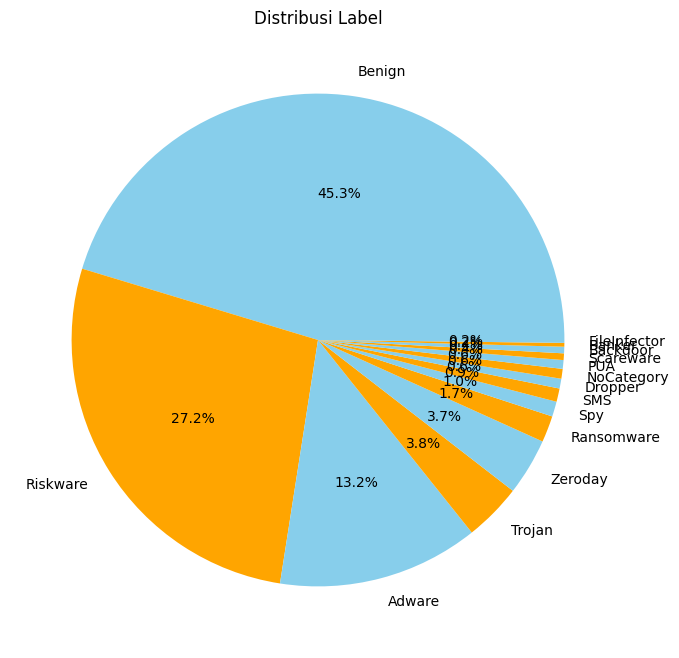

Deskripsi Distribusi Label:
Benign          162181
Riskware         97349
Adware           47210
Trojan           13559
Zeroday          13340
Ransomware        6202
Spy               3540
SMS               3125
Dropper           2302
NoCategory        2296
PUA               2051
Scareware         1556
Backdoor          1538
Banker             887
FileInfector       669
Name: Label, dtype: int64


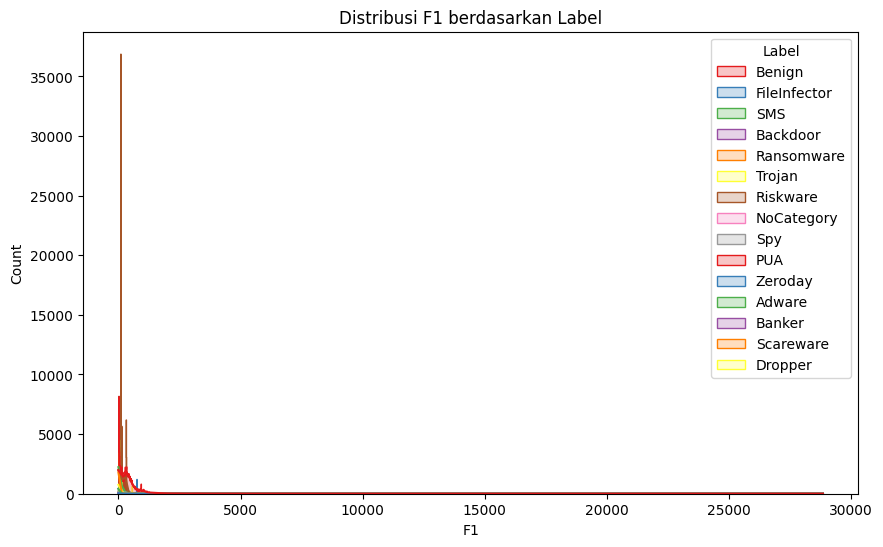


Deskripsi F1:
                 count        mean         std  min    25%    50%     75%  \
Label                                                                       
Adware         47210.0  109.960580  205.275008  0.0   14.0   61.0  120.00   
Backdoor        1538.0  135.394018  304.451166  0.0    4.0   66.0  125.75   
Banker           887.0   38.314543  114.968389  0.0    1.0    1.0   30.00   
Benign        162181.0  410.272190  497.858573  0.0  108.0  308.0  522.00   
Dropper         2302.0   59.463510  138.267219  0.0    4.0   12.0   34.00   
FileInfector     669.0   35.487294  146.627329  0.0    1.0    1.0    1.00   
NoCategory      2296.0  195.491289  414.469243  0.0    5.0   40.0  234.00   
PUA             2051.0  253.874208  376.295868  0.0   24.0  105.0  308.00   
Ransomware      6202.0    6.536924   56.748497  0.0    1.0    2.0    2.00   
Riskware       97349.0  133.401370  155.266927  0.0   78.0   84.0  128.00   
SMS             3125.0   31.706240   91.274512  0.0    2.0   

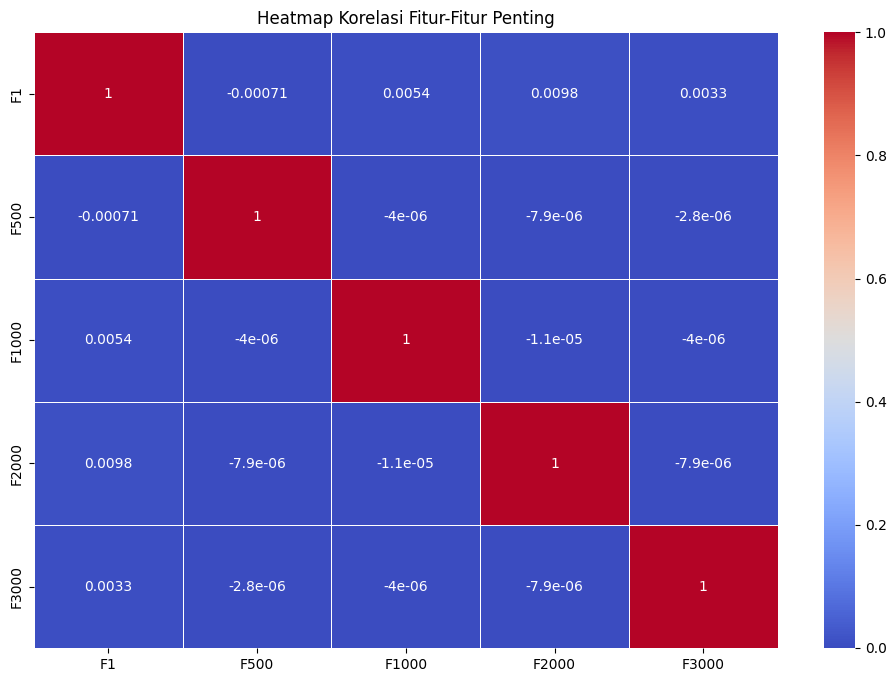


Deskripsi Korelasi Fitur:
             F1      F500     F1000     F2000     F3000
F1     1.000000 -0.000715  0.005396  0.009773  0.003320
F500  -0.000715  1.000000 -0.000004 -0.000008 -0.000003
F1000  0.005396 -0.000004  1.000000 -0.000011 -0.000004
F2000  0.009773 -0.000008 -0.000011  1.000000 -0.000008
F3000  0.003320 -0.000003 -0.000004 -0.000008  1.000000


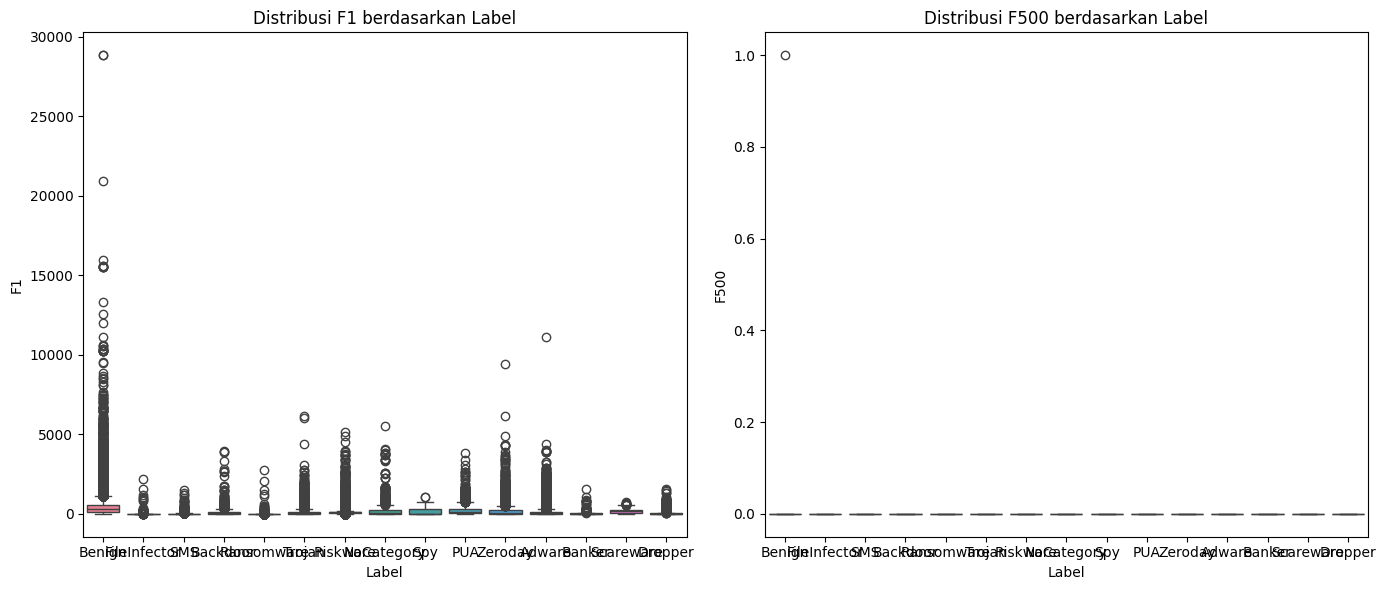


Deskripsi F1 dan F500:
                    F1                                                     \
                 count        mean         std  min    25%    50%     75%   
Label                                                                       
Adware         47210.0  109.960580  205.275008  0.0   14.0   61.0  120.00   
Backdoor        1538.0  135.394018  304.451166  0.0    4.0   66.0  125.75   
Banker           887.0   38.314543  114.968389  0.0    1.0    1.0   30.00   
Benign        162181.0  410.272190  497.858573  0.0  108.0  308.0  522.00   
Dropper         2302.0   59.463510  138.267219  0.0    4.0   12.0   34.00   
FileInfector     669.0   35.487294  146.627329  0.0    1.0    1.0    1.00   
NoCategory      2296.0  195.491289  414.469243  0.0    5.0   40.0  234.00   
PUA             2051.0  253.874208  376.295868  0.0   24.0  105.0  308.00   
Ransomware      6202.0    6.536924   56.748497  0.0    1.0    2.0    2.00   
Riskware       97349.0  133.401370  155.266927  0.0 

In [20]:
# Visualisasi Distribusi Label
plt.figure(figsize=(8, 8))
df_Static_Features["Label"].value_counts().plot(kind="pie", autopct="%1.1f%%", colors=['skyblue', 'orange'])
plt.title("Distribusi Label")
plt.ylabel("")  # Menghilangkan label y agar lebih bersih
plt.show()

# Deskripsi Singkat Tentang Distribusi Label
print("Deskripsi Distribusi Label:")
label_counts = df_Static_Features["Label"].value_counts()
print(label_counts)

# Visualisasi Distribusi F1 (Misalkan kolom ini relevan untuk dianalisis)
plt.figure(figsize=(10, 6))
sns.histplot(df_Static_Features, x="F1", hue="Label", element="step", palette="Set1", kde=True)
plt.title("Distribusi F1 berdasarkan Label")
plt.xlabel("F1")
plt.ylabel("Count")
plt.show()

# Deskripsi Singkat Tentang F1
print("\nDeskripsi F1:")
print(df_Static_Features.groupby("Label")["F1"].describe())

# Heatmap Korelasi Fitur-Fitur Penting (Misalkan kita pilih beberapa fitur relevan)
features_of_interest = ["F1", "F500", "F1000", "F2000", "F3000"]  # Pilih fitur-fitur yang relevan

plt.figure(figsize=(12, 8))
sns.heatmap(df_Static_Features[features_of_interest].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap Korelasi Fitur-Fitur Penting")
plt.show()

# Deskripsi Singkat Tentang Korelasi Fitur-Fitur Penting
print("\nDeskripsi Korelasi Fitur:")
print(df_Static_Features[features_of_interest].corr())

# Visualisasi Boxplot untuk Distribusi F1 dan F500
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x="Label", y="F1", data=df_Static_Features, hue="Label")
plt.title("Distribusi F1 berdasarkan Label")

plt.subplot(1, 2, 2)
sns.boxplot(x="Label", y="F500", data=df_Static_Features, hue="Label")
plt.title("Distribusi F500 berdasarkan Label")

plt.tight_layout()
plt.show()

# Deskripsi Singkat Tentang Distribusi F1 dan F500
print("\nDeskripsi F1 dan F500:")
print(df_Static_Features.groupby("Label")[["F1", "F500"]].describe())
